# Introduction to Matrices and Vectors: NumPy vs Pure Python



In this section, we'll implement some matrix operations using both NumPy and pure Python, and compare their performance.

In [3]:
import numpy as np
import time
import matplotlib.pyplot as plt

In [4]:
def python_matrix_add(A, B):
    if len(A) != len(B) or len(A[0]) != len(B[0]):
        raise ValueError("Matrices must have the same dimensions")
    
    result = [[0 for j in range(len(A[0]))] for i in range(len(A))]
    for i in range(len(A)):
        for j in range(len(A[0])):
            result[i][j] = A[i][j] + B[i][j]
    return result

In [5]:
def numpy_matrix_add(A, B):
    return np.add(A, B)

In [6]:
#### Comparison

# Generate random matrices
n = 1000
A = np.random.rand(n, n)
B = np.random.rand(n, n)

# Convert to list for pure Python function
A_list = A.tolist()
B_list = B.tolist()

# Time pure Python implementation
start = time.time()
python_result = python_matrix_add(A_list, B_list)
python_time = time.time() - start

# Time NumPy implementation
start = time.time()
numpy_result = numpy_matrix_add(A, B)
numpy_time = time.time() - start

print(f"Pure Python time: {python_time:.6f} seconds")
print(f"NumPy time: {numpy_time:.6f} seconds")
print(f"NumPy is {python_time / numpy_time:.2f} times faster")


Pure Python time: 0.043718 seconds
NumPy time: 0.000819 seconds
NumPy is 53.38 times faster


## Matrix Multiplication

In [7]:
#### Pure Python Implementation

def python_matrix_multiply(A, B):
    if len(A[0]) != len(B):
        raise ValueError("Number of columns in A must equal number of rows in B")
    
    result = [[0 for j in range(len(B[0]))] for i in range(len(A))]
    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(B)):
                result[i][j] += A[i][k] * B[k][j]
    return result

#### NumPy Implementation

def numpy_matrix_multiply(A, B):
    return np.matmul(A, B)

In [8]:
#### Comparison

# Generate smaller matrices for multiplication (due to time constraints)
n = 200
A = np.random.rand(n, n)
B = np.random.rand(n, n)

# Convert to list for pure Python function
A_list = A.tolist()
B_list = B.tolist()

# Time pure Python implementation
start = time.time()
python_result = python_matrix_multiply(A_list, B_list)
python_time = time.time() - start

# Time NumPy implementation
start = time.time()
numpy_result = numpy_matrix_multiply(A, B)
numpy_time = time.time() - start

print(f"Pure Python time: {python_time:.6f} seconds")
print(f"NumPy time: {numpy_time:.6f} seconds")
print(f"NumPy is {python_time / numpy_time:.2f} times faster")

Pure Python time: 0.282641 seconds
NumPy time: 0.000916 seconds
NumPy is 308.48 times faster


## Matrix Determinant

In [9]:
#### Pure Python Implementation

def python_determinant(A):
    n = len(A)
    if n == 1:
        return A[0][0]
    
    det = 0
    for j in range(n):
        submatrix = [row[:j] + row[j+1:] for row in A[1:]]
        sign = (-1) ** j
        det += sign * A[0][j] * python_determinant(submatrix)
    return det

#### NumPy Implementation

def numpy_determinant(A):
    return np.linalg.det(A)

In [10]:
#### Comparison

# Generate smaller matrix for determinant calculation
n = 7  # Pure Python implementation is very slow for larger matrices
A = np.random.rand(n, n)
A_list = A.tolist()

# Time pure Python implementation
start = time.time()
python_result = python_determinant(A_list)
python_time = time.time() - start

# Time NumPy implementation
start = time.time()
numpy_result = numpy_determinant(A)
numpy_time = time.time() - start

print(f"Pure Python time: {python_time:.6f} seconds")
print(f"NumPy time: {numpy_time:.6f} seconds")
print(f"NumPy is {python_time / numpy_time:.2f} times faster")

Pure Python time: 0.005545 seconds
NumPy time: 0.000083 seconds
NumPy is 66.64 times faster


## Performance Visualization

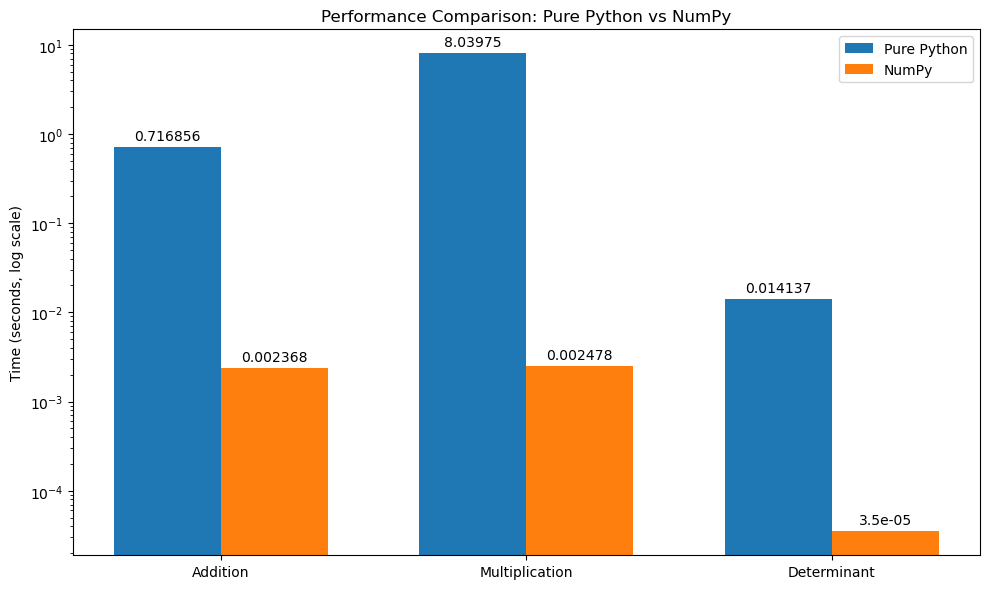

In [11]:
operations = ['Addition', 'Multiplication', 'Determinant']
python_times = [0.716856, 8.039754, 0.014137]  # Example times, replace with your actual results
numpy_times = [0.002368, 0.002478, 0.000035]   # Example times, replace with your actual results

x = np.arange(len(operations))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, python_times, width, label='Pure Python', log=True)
rects2 = ax.bar(x + width/2, numpy_times, width, label='NumPy', log=True)

ax.set_ylabel('Time (seconds, log scale)')
ax.set_title('Performance Comparison: Pure Python vs NumPy')
ax.set_xticks(x)
ax.set_xticklabels(operations)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()
plt.show()

## Discussion

As we can see from the performance comparisons:

1. NumPy is significantly faster than pure Python implementations for matrix operations.
2. The performance difference becomes more pronounced as the size of the matrices increases.
3. For complex operations like matrix multiplication and determinant calculation, the speed advantage of NumPy is even more significant.

Reasons for NumPy's superior performance:

1. Vectorization: NumPy uses vectorized operations, which can perform operations on entire arrays at once.
2. Efficient memory usage: NumPy arrays are more memory-efficient than Python lists.
3. Compiled C code: Many NumPy functions are implemented in C, which is much faster than interpreted Python.
4. Optimized algorithms: NumPy uses highly optimized algorithms for mathematical operations.

While it's important to understand how to implement these operations in pure Python, for real-world applications dealing with large datasets, using NumPy (or similar libraries) is crucial for performance.



Create a function that performs matrix transposition for both pure Python (nested lists) and NumPy implementations. Compare their performance for matrices of different sizes.


Size 10x10:
  Pure Python time: 0.000006 seconds
  NumPy time: 0.000004 seconds
  NumPy is 1.56 times faster

Size 100x100:
  Pure Python time: 0.000360 seconds
  NumPy time: 0.000010 seconds
  NumPy is 35.95 times faster

Size 500x500:
  Pure Python time: 0.007973 seconds
  NumPy time: 0.000028 seconds
  NumPy is 285.83 times faster

Size 1000x1000:
  Pure Python time: 0.034410 seconds
  NumPy time: 0.000019 seconds
  NumPy is 1804.08 times faster



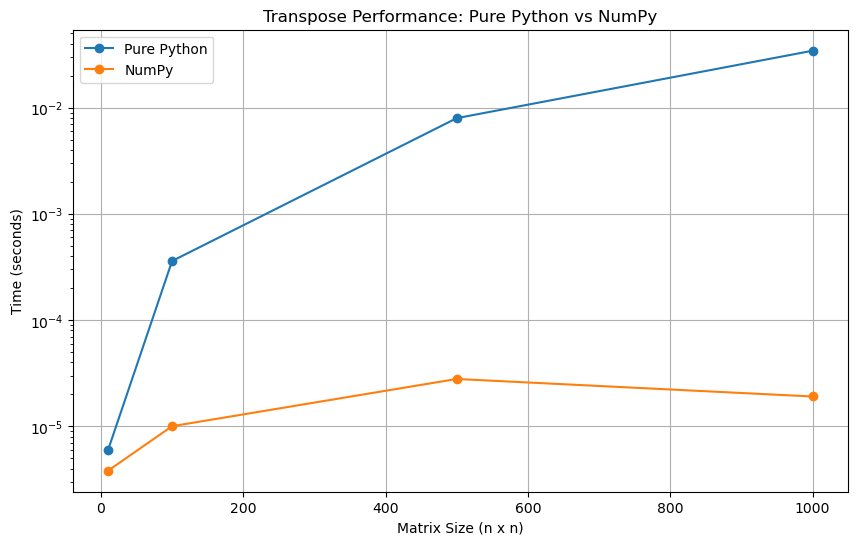

In [12]:
def python_transpose(A):
    return [[A[j][i] for j in range(len(A))] for i in range(len(A[0]))]

def numpy_transpose(A):
    return np.transpose(A)

def compare_transpose(sizes):
    python_times = []
    numpy_times = []
    
    for n in sizes:
        A = np.random.rand(n, n)
        A_list = A.tolist()
        
        # Time pure Python implementation
        start = time.time()
        python_result = python_transpose(A_list)
        python_time = time.time() - start
        python_times.append(python_time)
        
        # Time NumPy implementation
        start = time.time()
        numpy_result = numpy_transpose(A)
        numpy_time = time.time() - start
        numpy_times.append(numpy_time)
        
        print(f"Size {n}x{n}:")
        print(f"  Pure Python time: {python_time:.6f} seconds")
        print(f"  NumPy time: {numpy_time:.6f} seconds")
        print(f"  NumPy is {python_time / numpy_time:.2f} times faster")
        print()
    
    return python_times, numpy_times

sizes = [10, 100, 500, 1000]
python_times, numpy_times = compare_transpose(sizes)

plt.figure(figsize=(10, 6))
plt.plot(sizes, python_times, marker='o', label='Pure Python')
plt.plot(sizes, numpy_times, marker='o', label='NumPy')
plt.xlabel('Matrix Size (n x n)')
plt.ylabel('Time (seconds)')
plt.title('Transpose Performance: Pure Python vs NumPy')
plt.legend()
plt.yscale('log')
plt.grid(True)
plt.show()

## Applications in Finance and Economics and Opencv

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats


Portfolio Optimization using Mean-Variance Analysis

Mean-Variance Analysis, developed by Harry Markowitz, uses matrices to find the optimal portfolio allocation. We'll implement a simple version of this model.

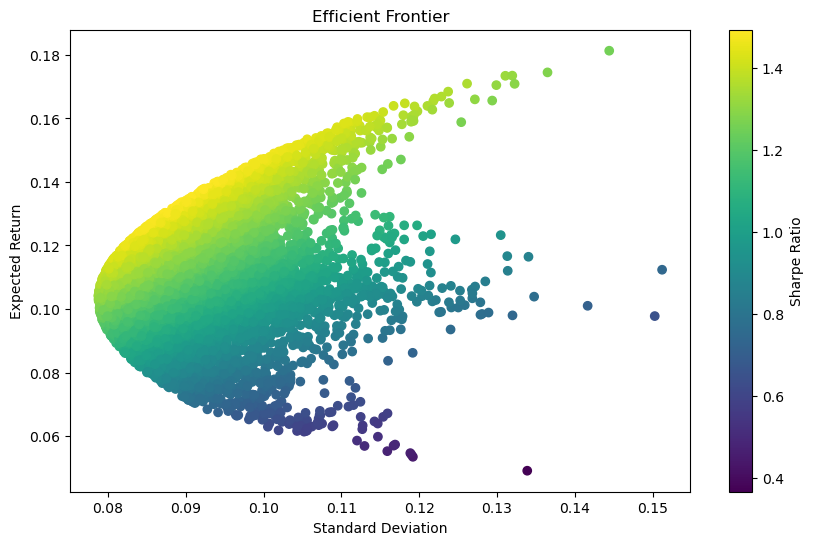

This visualization shows the efficient frontier, a key concept in modern portfolio theory.
Each point represents a portfolio, with the color indicating its Sharpe ratio.
The optimal portfolio lies on the efficient frontier and maximizes the Sharpe ratio.


In [14]:
def portfolio_performance(weights, returns):
    portfolio_return = np.sum(returns.mean() * weights) * 252
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))
    return portfolio_return, portfolio_std

# Sample data: daily returns for 4 stocks over a year
np.random.seed(42)
n_assets = 4
n_days = 252

returns = pd.DataFrame(np.random.randn(n_days, n_assets) * 0.01 + 0.0002,
                       columns=[f'Stock_{i}' for i in range(1, n_assets+1)])

# Generate random portfolio weights
n_portfolios = 10000
results = np.zeros((3, n_portfolios))

for i in range(n_portfolios):
    weights = np.random.random(n_assets)
    weights /= np.sum(weights)
    portfolio_return, portfolio_std = portfolio_performance(weights, returns)
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std
    results[2,i] = results[0,i] / results[1,i]  # Sharpe ratio

# Plot efficient frontier
plt.figure(figsize=(10, 6))
plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Standard Deviation')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier')
plt.show()

print("This visualization shows the efficient frontier, a key concept in modern portfolio theory.")
print("Each point represents a portfolio, with the color indicating its Sharpe ratio.")
print("The optimal portfolio lies on the efficient frontier and maximizes the Sharpe ratio.")

Input-Output Analysis in Economics

Input-Output analysis, developed by Wassily Leontief, uses matrices to model interdependencies between different sectors of an economy.


In [15]:
def leontief_inverse(A):
    n = A.shape[0]
    I = np.eye(n)
    return np.linalg.inv(I - A)

# Sample data: 3-sector economy
# A: technical coefficients matrix
A = np.array([[0.2, 0.3, 0.1],
              [0.1, 0.3, 0.2],
              [0.3, 0.1, 0.2]])

# d: final demand vector
d = np.array([100, 200, 150])

# Calculate Leontief inverse
L = leontief_inverse(A)

# Calculate total output
x = np.dot(L, d)

print("Technical Coefficients Matrix (A):")
print(A)
print("\nFinal Demand Vector (d):")
print(d)
print("\nLeontief Inverse (L):")
print(L)
print("\nTotal Output Vector (x):")
print(x)

print("\nInterpretation:")
print("- The technical coefficients matrix (A) shows the input requirements from each sector to produce one unit of output in another sector.")
print("- The Leontief inverse (L) captures both direct and indirect effects of changes in final demand.")
print("- The total output vector (x) represents the total production required to meet the given final demand.")

Technical Coefficients Matrix (A):
[[0.2 0.3 0.1]
 [0.1 0.3 0.2]
 [0.3 0.1 0.2]]

Final Demand Vector (d):
[100 200 150]

Leontief Inverse (L):
[[1.4673913  0.67934783 0.35326087]
 [0.38043478 1.6576087  0.46195652]
 [0.59782609 0.46195652 1.44021739]]

Total Output Vector (x):
[335.59782609 438.85869565 368.20652174]

Interpretation:
- The technical coefficients matrix (A) shows the input requirements from each sector to produce one unit of output in another sector.
- The Leontief inverse (L) captures both direct and indirect effects of changes in final demand.
- The total output vector (x) represents the total production required to meet the given final demand.


Econometrics: Ordinary Least Squares (OLS) Regression

Our OLS estimation:
Intercept: 2.0037, Coefficient: 2.9284

SciPy's OLS estimation:
Intercept: 2.0037, Coefficient: 2.9284


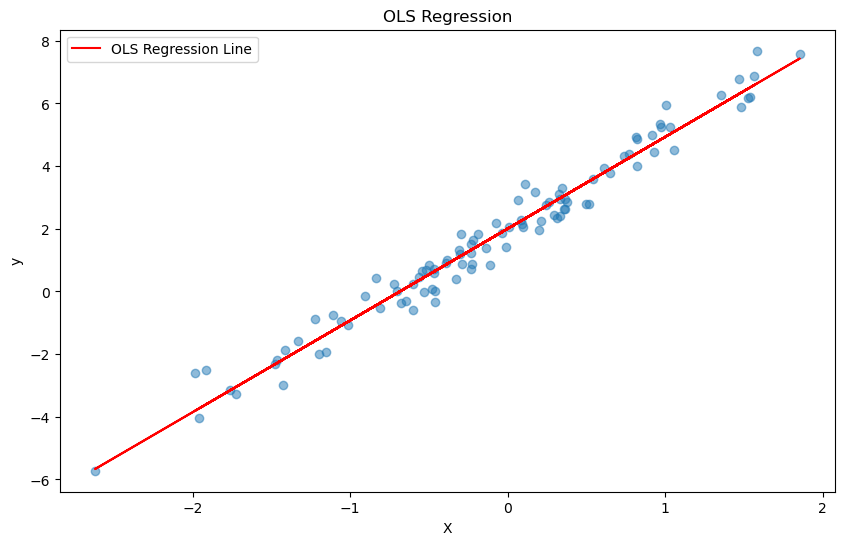


Interpretation:
- The scatter plot shows the relationship between X and y.
- The red line is the OLS regression line, which minimizes the sum of squared residuals.
- The intercept represents the expected value of y when X is zero.
- The coefficient represents the change in y for a one-unit increase in X.


In [16]:
def ols_estimation(X, y):
    # Add constant term to X
    X = np.column_stack((np.ones(X.shape[0]), X))
    # Calculate beta: β = (X'X)^(-1)X'y
    beta = np.linalg.inv(X.T @ X) @ X.T @ y
    return beta

# Generate sample data
np.random.seed(42)
n_samples = 100
X = np.random.randn(n_samples, 1)
y = 2 + 3 * X + np.random.randn(n_samples, 1) * 0.5

# Our OLS implementation
beta_our = ols_estimation(X, y)

# SciPy's OLS implementation
beta_scipy, _, _, _ = np.linalg.lstsq(np.column_stack((np.ones(X.shape[0]), X)), y, rcond=None)

print("Our OLS estimation:")
print(f"Intercept: {beta_our[0][0]:.4f}, Coefficient: {beta_our[1][0]:.4f}")

print("\nSciPy's OLS estimation:")
print(f"Intercept: {beta_scipy[0][0]:.4f}, Coefficient: {beta_scipy[1][0]:.4f}")

# Visualize the regression
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5)
plt.plot(X, beta_our[0] + beta_our[1]*X, color='red', label='OLS Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('OLS Regression')
plt.legend()
plt.show()

print("\nInterpretation:")
print("- The scatter plot shows the relationship between X and y.")
print("- The red line is the OLS regression line, which minimizes the sum of squared residuals.")
print("- The intercept represents the expected value of y when X is zero.")
print("- The coefficient represents the change in y for a one-unit increase in X.")

Time Series Analysis: Vector Autoregression (VAR)

VAR models are used to capture linear interdependencies among multiple time series. We'll implement a simple VAR(1) model.

VAR(1) Coefficients:
Y1[t] = 0.2822 + 0.5162*Y1[t-1] + 0.2602*Y2[t-1]
Y2[t] = 0.6030 + 0.2243*Y1[t-1] + 0.5666*Y2[t-1]


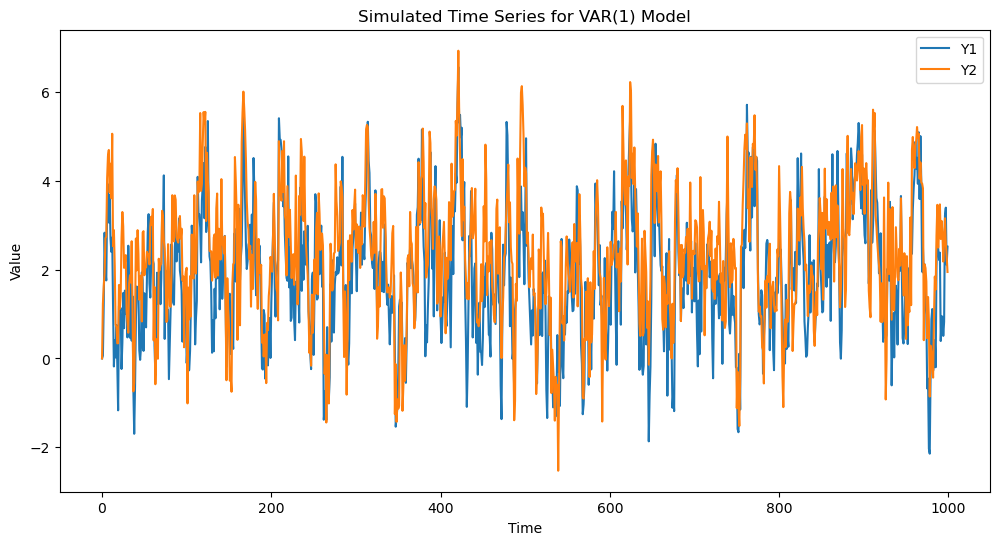


Interpretation:
- The plot shows two correlated time series, Y1 and Y2.
- The VAR(1) model captures the interdependencies between these series.
- Each series is modeled as a function of its own lagged value, the lagged value of the other series, and a constant term.
- The coefficients show the strength and direction of these relationships.


In [17]:
def var1_estimation(Y):
    # Y is a T x K matrix of time series data
    T, K = Y.shape
    Y_lagged = Y[:-1]
    Y_current = Y[1:]
    
    # Add constant term to Y_lagged
    Y_lagged = np.column_stack((np.ones(T-1), Y_lagged))
    
    # Estimate VAR(1) coefficients
    beta = np.linalg.inv(Y_lagged.T @ Y_lagged) @ Y_lagged.T @ Y_current
    
    return beta

# Generate sample data: two correlated time series
np.random.seed(42)
T = 1000
e1 = np.random.randn(T)
e2 = 0.5 * e1 + np.random.randn(T) * np.sqrt(1 - 0.5**2)

y1 = np.zeros(T)
y2 = np.zeros(T)

for t in range(1, T):
    y1[t] = 0.2 + 0.5 * y1[t-1] + 0.3 * y2[t-1] + e1[t]
    y2[t] = 0.5 + 0.2 * y1[t-1] + 0.6 * y2[t-1] + e2[t]

Y = np.column_stack((y1, y2))

# Estimate VAR(1) model
beta = var1_estimation(Y)

print("VAR(1) Coefficients:")
print("Y1[t] = {:.4f} + {:.4f}*Y1[t-1] + {:.4f}*Y2[t-1]".format(beta[0,0], beta[1,0], beta[2,0]))
print("Y2[t] = {:.4f} + {:.4f}*Y1[t-1] + {:.4f}*Y2[t-1]".format(beta[0,1], beta[1,1], beta[2,1]))

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(y1, label='Y1')
plt.plot(y2, label='Y2')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Simulated Time Series for VAR(1) Model')
plt.legend()
plt.show()

print("\nInterpretation:")
print("- The plot shows two correlated time series, Y1 and Y2.")
print("- The VAR(1) model captures the interdependencies between these series.")
print("- Each series is modeled as a function of its own lagged value, the lagged value of the other series, and a constant term.")
print("- The coefficients show the strength and direction of these relationships.")

Practice Problem: Economic Multiplier Analysis

The economic multiplier effect is a key concept in macroeconomics. Create a function that calculates the output multiplier for a simple Keynesian model, given the marginal propensity to consume (MPC).

Hint: The output multiplier is given by 1 / (1 - MPC).

Then, use this function to analyze how changes in MPC affect the multiplier, and visualize the results.

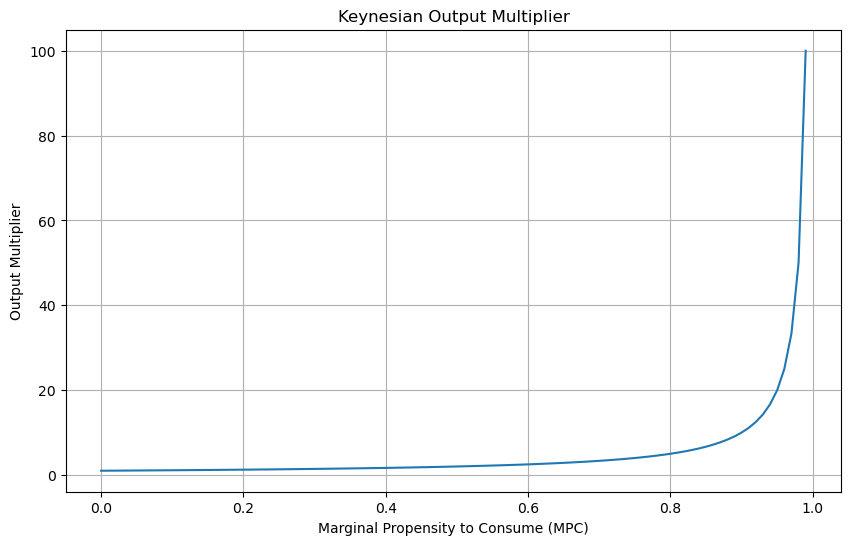

Interpretation:
- The graph shows how the output multiplier increases as the MPC increases.
- A higher MPC leads to a larger multiplier effect, as more of each additional dollar of income is spent.
- As MPC approaches 1, the multiplier approaches infinity, though this is not realistic in practice.
- This relationship helps explain why policies that increase consumer spending can have a magnified effect on total output.


In [18]:
def output_multiplier(mpc):
    return 1 / (1 - mpc)

mpc_values = np.linspace(0, 0.99, 100)
multipliers = [output_multiplier(mpc) for mpc in mpc_values]

plt.figure(figsize=(10, 6))
plt.plot(mpc_values, multipliers)
plt.xlabel('Marginal Propensity to Consume (MPC)')
plt.ylabel('Output Multiplier')
plt.title('Keynesian Output Multiplier')
plt.grid(True)
plt.show()

print("Interpretation:")
print("- The graph shows how the output multiplier increases as the MPC increases.")
print("- A higher MPC leads to a larger multiplier effect, as more of each additional dollar of income is spent.")
print("- As MPC approaches 1, the multiplier approaches infinity, though this is not realistic in practice.")
print("- This relationship helps explain why policies that increase consumer spending can have a magnified effect on total output.")
